<a href="https://colab.research.google.com/github/aliciawill/BigData/blob/master/6_4_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 환경 설정

In [1]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  

# 2. 데이터셋 준비

In [2]:
# IMDb 영화 리뷰 데이터셋
from tensorflow.keras import datasets
imdb = datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000, index_from=3)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,) (25000,) (25000,)


In [3]:
# 첫번째 리뷰 - 벡터
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# 첫번째 리뷰 - 벡터 길의 (원소 개수)
len(X_train[0])

218

In [5]:
word_index = imdb.get_word_index()
word_index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [6]:
# 숫자 벡터를 텍스트로 변환
def decode_review_vector(review_vector):
    index_to_word = {value:key for key, value in word_index.items()}
    decoded_review = ' '.join([index_to_word.get(idx - 3, '?') for idx in review_vector])
    return decoded_review

# 첫번째 리뷰 디코딩
decode_review_vector(X_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# 첫번째 리뷰의 정답 레이블 
y_train[0]

1

# 3. 데이터 전처리

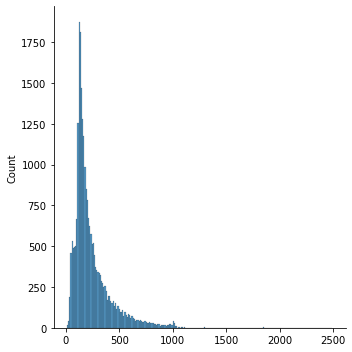

In [8]:
# 각 리뷰의 단어 개수 분포
review_length = [len(review) for review in X_train]
sns.displot(review_length);

In [9]:
# Padding
from tensorflow.keras.preprocessing import sequence
X_train_pad = sequence.pad_sequences(X_train, maxlen=250)
X_test_pad = sequence.pad_sequences(X_test, maxlen=250)

print(X_train_pad[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    1   14   22   16   43  530  973 1622 1385   65
  458 4468   66 3941    4  173   36  256    5   25  100   43  838  112
   50  670    2    9   35  480  284    5  150    4  172  112  167    2
  336  385   39    4  172 4536 1111   17  546   38   13  447    4  192
   50   16    6  147 2025   19   14   22    4 1920 4613  469    4   22
   71   87   12   16   43  530   38   76   15   13 1247    4   22   17
  515   17   12   16  626   18    2    5   62  386   12    8  316    8
  106    5    4 2223 5244   16  480   66 3785   33    4  130   12   16
   38  619    5   25  124   51   36  135   48   25 1415   33    6   22
   12  215   28   77   52    5   14  407   16   82    2    8    4  107
  117 5952   15  256    4    2    7 3766    5  723   36   71   43  530
  476   26  400  317   46    7    4    2 1029   13  104   88    4  381
   15 

# 4. 모델 학습

In [10]:
# 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU

def build_model(model_type='RNN'):
    model = Sequential()
    # Embedding
    model.add(Embedding(input_dim=10000, output_dim=128))
    
    # RNN
    if model_type=='RNN':
        model.add(SimpleRNN(units=64, return_sequences=True)) 
        model.add(SimpleRNN(units=64)) 
    # LSTM
    elif model_type=='LSTM':
        model.add(LSTM(units=64, return_sequences=True)) 
        model.add(LSTM(units=64)) 
    # GRU
    elif model_type=='GRU':
        model.add(GRU(units=64, return_sequences=True)) 
        model.add(GRU(units=64))    

    # Dense Classifier
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile
    model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

    return model

In [11]:
rnn_model = build_model('RNN')
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,302,721
Trainable params: 1,302,721
Non-

In [ ]:
rnn_history = rnn_model.fit(X_train_pad, y_train, batch_size=32, epochs=10,
                        validation_split=0.1, verbose=2) 

Epoch 1/10


In [ ]:
# 20 epoch 까지 손실함수와 정확도를 그래프로 나타내는 함수

def plot_metrics(history, start=1, end=20):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Loss: 손실 함수
    axes[0].plot(range(start, end+1), history.history['loss'][start-1:end], 
                label='Train')
    axes[0].plot(range(start, end+1), history.history['val_loss'][start-1:end], 
                label='Validation')
    axes[0].set_title('Loss')
    axes[0].legend()
    # Accuraccy: 예측 정확도
    axes[1].plot(range(start, end+1), history.history['accuracy'][start-1:end], 
                label='Train')
    axes[1].plot(range(start, end+1), history.history['val_accuracy'][start-1:end], 
                label='Validation')
    axes[1].set_title('Accuracy')
    axes[1].legend()
plt.show()

# 그래프 그리기
plot_metrics(history=rnn_history, start=1, end=10)    

In [ ]:
# LSTM 모델 적용
lstm_model = build_model('LSTM')

lstm_history = lstm_model.fit(X_train_pad, y_train, batch_size=32, epochs=10,
                        validation_split=0.1, verbose=0) 

plot_metrics(history=lstm_history, start=1, end=10)   

In [ ]:
# GRU 모델 적용
gru_model = build_model('GRU')
gru_model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

gru_history = gru_model.fit(X_train_pad, y_train, batch_size=32, epochs=10,
                        validation_split=0.1, verbose=0) 

plot_metrics(history=gru_history, start=1, end=10)   